In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
ds = pd.read_csv("students_placement.csv")
ds.drop(columns=["profile_score"], inplace=True)
ds.head

<bound method NDFrame.head of      cgpa   iq  placed
0    5.97  106       0
1    6.83  113       0
2    6.60  110       0
3    5.54  113       0
4    6.84  102       0
..    ...  ...     ...
295  6.44  107       0
296  6.09  108       0
297  7.68  101       1
298  7.00   90       1
299  4.79  118       0

[300 rows x 3 columns]>

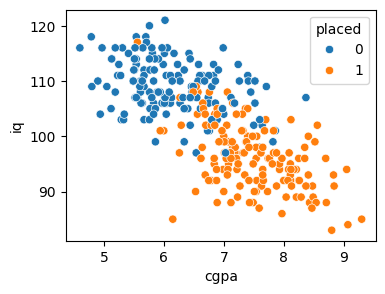

In [19]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=ds["cgpa"], y=ds["iq"], hue=ds["placed"])
plt.show()
# hue refers to the use of color to distinguish different categories or classes
# in a dataset.

In [20]:
x = ds[["cgpa", "iq"]]
#x.ndim
y = ds["placed"]
y.ndim

1

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
xx= x.copy()

In [23]:
pf = PolynomialFeatures(degree=4)
pf.fit(xx)

PolynomialFeatures(degree=4)

In [24]:
xx = pd.DataFrame(pf.transform(xx))
xx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,5.97,106.0,35.6409,632.82,11236.0,212.776173,3777.9354,67078.92,1191016.0,1270.273753,22554.274338,400461.1524,7110365.52,126247696.0
1,1.0,6.83,113.0,46.6489,771.79,12769.0,318.611987,5271.3257,87212.27,1442897.0,2176.119871,36003.154531,595659.8041,9854986.51,163047361.0
2,1.0,6.60,110.0,43.5600,726.00,12100.0,287.496000,4791.6000,79860.00,1331000.0,1897.473600,31624.560000,527076.0000,8784600.00,146410000.0
3,1.0,5.54,113.0,30.6916,626.02,12769.0,170.031464,3468.1508,70740.26,1442897.0,941.974311,19213.555432,391901.0404,7993649.38,163047361.0
4,1.0,6.84,102.0,46.7856,697.68,10404.0,320.013504,4772.1312,71163.36,1061208.0,2188.892367,32641.377408,486757.3824,7258662.72,108243216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,6.44,107.0,41.4736,689.08,11449.0,267.089984,4437.6752,73731.56,1225043.0,1720.059497,28578.628288,474831.2464,7889276.92,131079601.0
296,1.0,6.09,108.0,37.0881,657.72,11664.0,225.866529,4005.5148,71033.76,1259712.0,1375.527162,24393.585132,432595.5984,7671646.08,136048896.0
297,1.0,7.68,101.0,58.9824,775.68,10201.0,452.984832,5957.2224,78343.68,1030301.0,3478.923510,45751.468032,601679.4624,7912711.68,104060401.0
298,1.0,7.00,90.0,49.0000,630.00,8100.0,343.000000,4410.0000,56700.00,729000.0,2401.000000,30870.000000,396900.0000,5103000.00,65610000.0


In [25]:
from sklearn.model_selection import train_test_split

In [34]:
xx_train,xx_test, yy_train, yy_test = train_test_split(xx,y, test_size=.20, random_state=70)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(xx_train,yy_train)

C:\Users\IC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
lr.score(xx_test,yy_test)*100

95.0